## **Loading the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## **Loading the dataset**

In [2]:
df = pd.read_csv("austin_weather.csv")

In [3]:
df

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


## **Basic Data Cleaning**

In [4]:
np.sum(df=='-')

Date                           0
TempHighF                      0
TempAvgF                       0
TempLowF                       0
DewPointHighF                  7
DewPointAvgF                   7
DewPointLowF                   7
HumidityHighPercent            2
HumidityAvgPercent             2
HumidityLowPercent             2
SeaLevelPressureHighInches     3
SeaLevelPressureAvgInches      3
SeaLevelPressureLowInches      3
VisibilityHighMiles           12
VisibilityAvgMiles            12
VisibilityLowMiles            12
WindHighMPH                    2
WindAvgMPH                     2
WindGustMPH                    4
PrecipitationSumInches         0
Events                         0
dtype: int64

In [5]:
df = df.replace('-',np.nan)

In [6]:
np.sum(df=='-')

Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
Events                        0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
del df['Date'], df['PrecipitationSumInches'], df['Events']

In [9]:
df.dtypes

TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                 object
DewPointAvgF                  object
DewPointLowF                  object
HumidityHighPercent           object
HumidityAvgPercent            object
HumidityLowPercent            object
SeaLevelPressureHighInches    object
SeaLevelPressureAvgInches     object
SeaLevelPressureLowInches     object
VisibilityHighMiles           object
VisibilityAvgMiles            object
VisibilityLowMiles            object
WindHighMPH                   object
WindAvgMPH                    object
WindGustMPH                   object
dtype: object

In [10]:
for col in df.columns:
  df[col] = df[col].astype(float)

df.dtypes

TempHighF                     float64
TempAvgF                      float64
TempLowF                      float64
DewPointHighF                 float64
DewPointAvgF                  float64
DewPointLowF                  float64
HumidityHighPercent           float64
HumidityAvgPercent            float64
HumidityLowPercent            float64
SeaLevelPressureHighInches    float64
SeaLevelPressureAvgInches     float64
SeaLevelPressureLowInches     float64
VisibilityHighMiles           float64
VisibilityAvgMiles            float64
VisibilityLowMiles            float64
WindHighMPH                   float64
WindAvgMPH                    float64
WindGustMPH                   float64
dtype: object

In [11]:
df = df[['TempAvgF','DewPointAvgF','HumidityAvgPercent','SeaLevelPressureAvgInches','VisibilityAvgMiles','WindAvgMPH']]

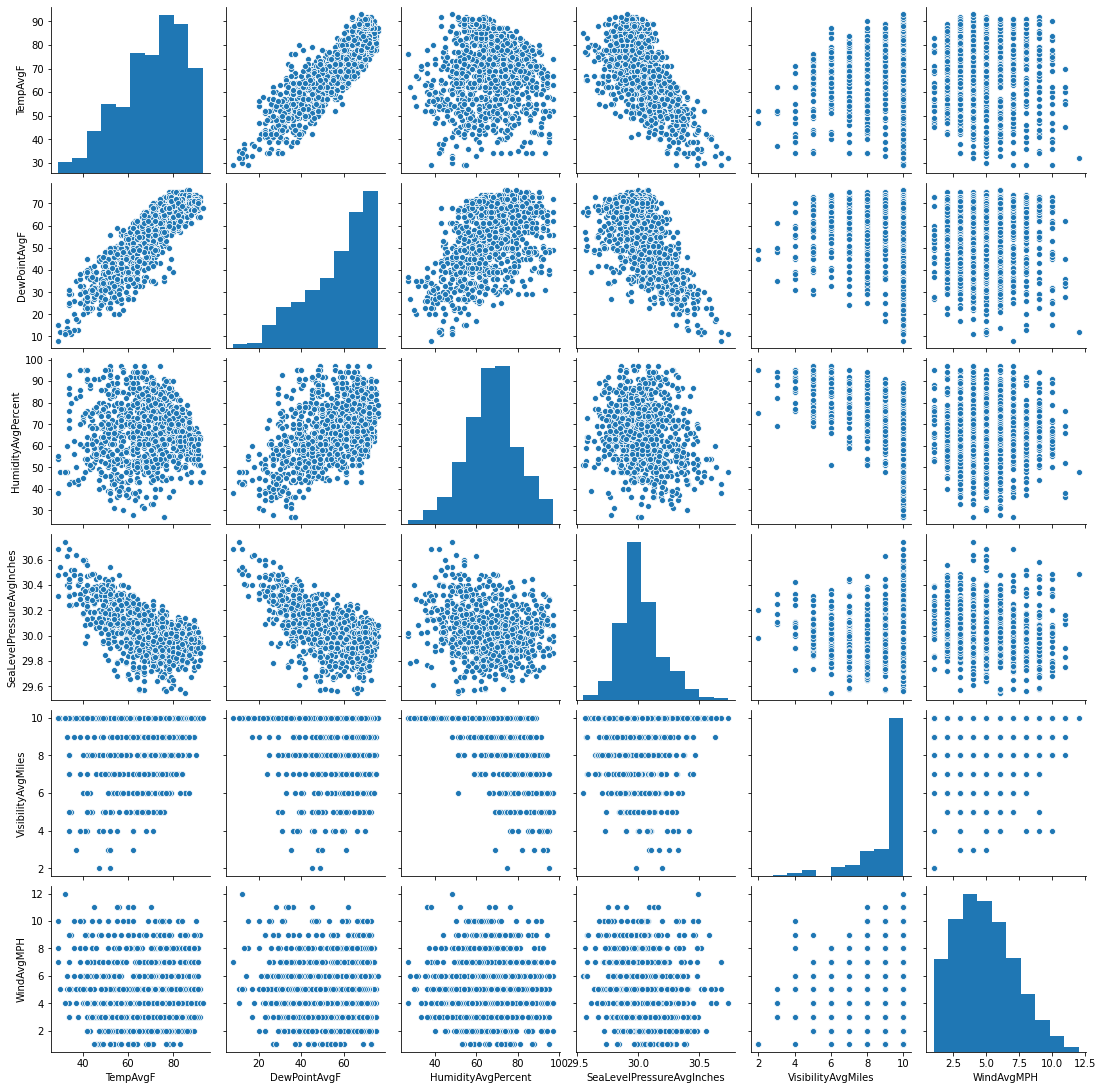

In [12]:
sns.pairplot(df)

                           TempAvgF  DewPointAvgF  HumidityAvgPercent  \
TempAvgF                   1.000000      0.894938            0.033283   
DewPointAvgF               0.894938      1.000000            0.453857   
HumidityAvgPercent         0.033283      0.453857            1.000000   
SeaLevelPressureAvgInches -0.622146     -0.631434           -0.181244   
VisibilityAvgMiles         0.209575     -0.064415           -0.584796   
WindAvgMPH                 0.038028      0.038796           -0.001560   

                           SeaLevelPressureAvgInches  VisibilityAvgMiles  \
TempAvgF                                   -0.622146            0.209575   
DewPointAvgF                               -0.631434           -0.064415   
HumidityAvgPercent                         -0.181244           -0.584796   
SeaLevelPressureAvgInches                   1.000000            0.066458   
VisibilityAvgMiles                          0.066458            1.000000   
WindAvgMPH                      

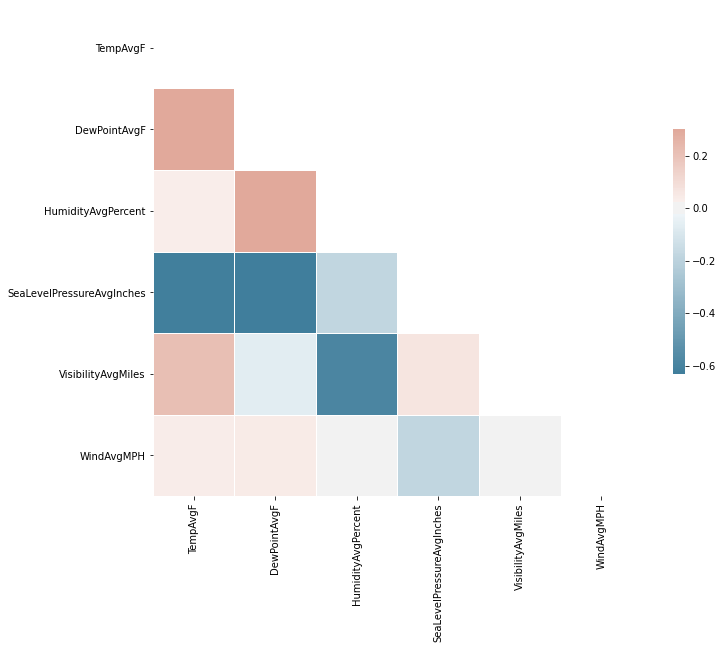

In [13]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

print(corr)

clearly the most important variables to consider to predict Sea Level Average Pressure, are DewPointAvgF and TempAvgF

/home/sysadm/.local/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


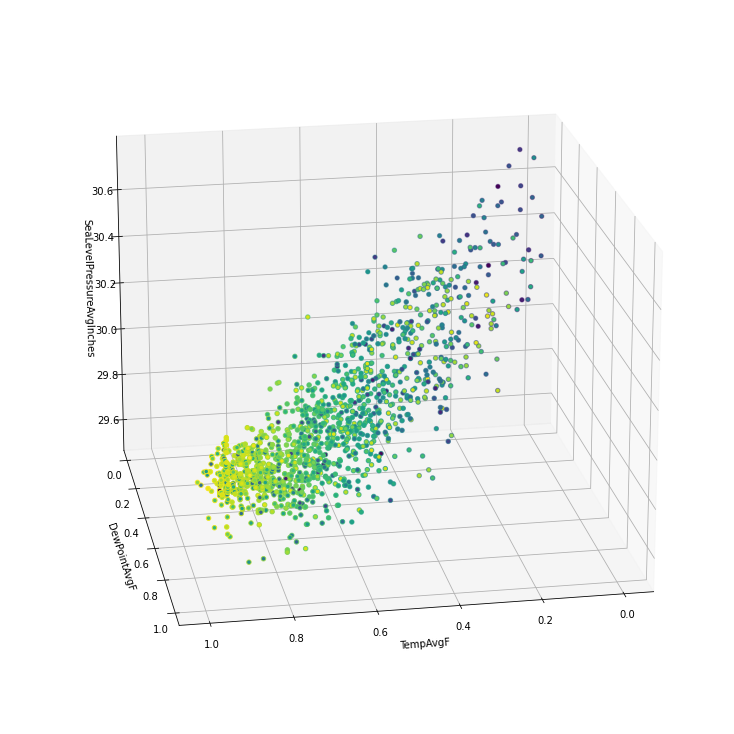

In [14]:
x1 = df['TempAvgF']; x2 = df['DewPointAvgF']; y = df['SeaLevelPressureAvgInches']

x1_nor = (x1 - np.min(x1))/(np.max(x1) - np.min(x1))
x2_nor = (x2 - np.min(x2))/(np.max(x2) - np.min(x2))

fig = plt.figure(figsize = (10,10))

ax = Axes3D(fig)

ax.scatter(x1_nor,x2_nor,y,c=x1_nor)
ax.set_xlabel('TempAvgF')
ax.set_ylabel('DewPointAvgF')
ax.set_zlabel('SeaLevelPressureAvgInches')

ax.view_init(20,80)
plt.show()

Clearly, avg Temperature and avg dewpoint are linearly correlated with abg sea-level pressure. Then we can fit a regression plane. Here we shall perform the regressions for predicting Average SeaLevelPressure from average Temperature and average dewpoint seperately and then jointly, and then compare both the model's accuracies. 

### **SeaLevelPressureAvgInches prediction using TempAvgF**

Coefficients: 
 [[-0.47740835]]
intercept: 
 [30.33164383]
Mean squared error: 0.0175
Coefficient of determination: 0.4568


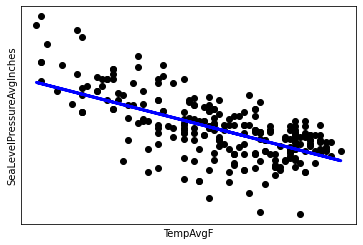

In [21]:
x = x1_nor
test_split_percentage = 20

test_size = int(len(x)*0.2)
test_idx = np.random.choice(len(x), test_size)
train_idx = list(set(range(len(x))).difference(set(test_idx)))

x = np.array(x).reshape(len(x),1)
y = np.array(y).reshape(len(y),1)

# Split the data into training/testing sets
x_train = x[train_idx]; y_train = y[train_idx]
x_test = x[test_idx]; y_test = y[test_idx]


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('intercept: \n', regr.intercept_)
# The mean squared error
print('Mean squared error: %.4f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel('TempAvgF')
plt.ylabel('SeaLevelPressureAvgInches')

plt.show()

### **SeaLevelPressureAvgInches prediction using DewPointAvgF**

Coefficients: 
 [[-0.48297502]]
intercept: 
 [30.3677082]
Mean squared error: 0.0162
Coefficient of determination: 0.4555


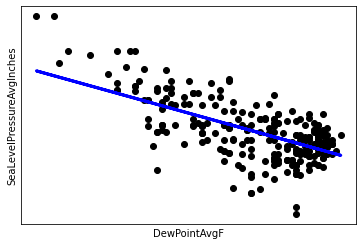

In [22]:
x = x2_nor
test_split_percentage = 20

test_size = int(len(x)*0.2)
test_idx = np.random.choice(len(x), test_size)
train_idx = list(set(range(len(x))).difference(set(test_idx)))

x = np.array(x).reshape(len(x),1)
y = np.array(y).reshape(len(y),1)

# Split the data into training/testing sets
x_train = x[train_idx]; y_train = y[train_idx]
x_test = x[test_idx]; y_test = y[test_idx]


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('intercept: \n', regr.intercept_)
# The mean squared error
print('Mean squared error: %.4f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel('DewPointAvgF')
plt.ylabel('SeaLevelPressureAvgInches')

plt.show()

### **SeaLevelPressureAvgInches prediction using TempAvgF and DewPointAvgF both**

In [17]:
X = np.hstack((np.array(x1_nor).reshape(len(x1_nor),1), np.array(x2_nor).reshape(len(x2_nor),1)))

In [18]:
X

array([[0.484375  , 0.60294118],
       [0.296875  , 0.41176471],
       [0.25      , 0.27941176],
       ...,
       [0.984375  , 0.82352941],
       [1.        , 0.88235294],
       [0.921875  , 0.77941176]])

Coefficients: 
 [[-0.20480404 -0.31985558]]
intercept: 
 [30.38608673]
Mean squared error: 0.0176
Coefficient of determination: 0.3893


/home/sysadm/.local/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


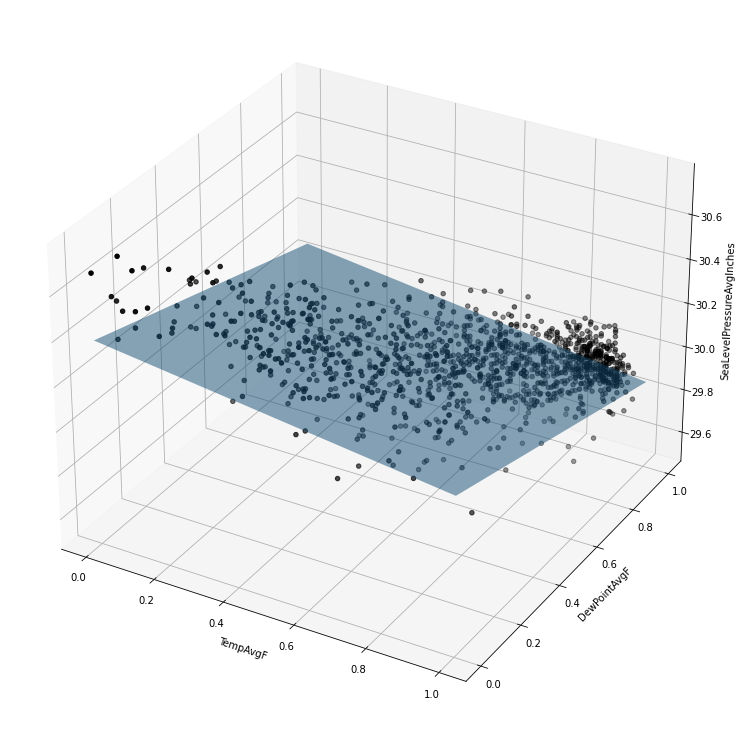

In [23]:
x = X
test_split_percentage = 20

test_size = int(len(x)*0.2)
test_idx = np.random.choice(len(x), test_size)
train_idx = list(set(range(len(x))).difference(set(test_idx)))


# Split the data into training/testing sets
x_train = x[train_idx,:]; y_train = y[train_idx]
x_test = x[test_idx,:]; y_test = y[test_idx]


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('intercept: \n', regr.intercept_)
# The mean squared error
print('Mean squared error: %.4f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))

# Plot outputs

def plane(xx,yy):
  z = regr.coef_[0][0]*xx + regr.coef_[0][1]*yy + regr.intercept_
  return z


fig = plt.figure(figsize = (10,10))
ax = Axes3D(fig)

xx, yy = np.meshgrid(range(2), range(2))
z = plane(xx,yy)

# plot the plane
ax.plot_surface(xx, yy, z, alpha=0.5)
ax.scatter(x1_nor,x2_nor,y,c='black')

ax.set_xlabel('TempAvgF')
ax.set_ylabel('DewPointAvgF')
ax.set_zlabel('SeaLevelPressureAvgInches')

#ax.view_init(20,80)
plt.show()